# Ultimate Technologies Part 1 Exploratory Data Analysis

### The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Login counts will be aggregated based on 15-minute time intervals, and then the resulting time series of login counts will be visualized and described in ways that best characterize the underlying patterns of the demand. Important features of the demand will be illustrated, including  daily cycles and data issues will be reported


## Import Libraries

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

## Load Data

In [2]:
# Create a dataframe logins json

logins = pd.read_json('logins.json')

In [3]:
# Explore logins

logins.head(15)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [4]:
# count the logins, there's one per time stamp

logins['logins'] = 1

logins

,login_time,logins
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1
...,...,...
93137,1970-04-13 18:50:19,1
93138,1970-04-13 18:43:56,1
93139,1970-04-13 18:54:02,1
93140,1970-04-13 18:57:38,1


## Data entries not in sequential order

In [5]:
# note above and below here entries are not in sequential order
logins.head(20)

,login_time,logins
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1
5,1970-01-01 20:21:41,1
6,1970-01-01 20:12:16,1
7,1970-01-01 20:35:47,1
8,1970-01-01 20:35:38,1
9,1970-01-01 20:47:52,1


In [6]:
logins.tail(15)

,login_time,logins
93127,1970-04-13 18:14:55,1
93128,1970-04-13 18:12:34,1
93129,1970-04-13 18:35:43,1
93130,1970-04-13 18:36:55,1
93131,1970-04-13 18:43:19,1
93132,1970-04-13 18:36:53,1
93133,1970-04-13 18:40:31,1
93134,1970-04-13 18:46:06,1
93135,1970-04-13 18:40:40,1
93136,1970-04-13 18:48:52,1


## Sort entries and convert datestamp column to index

In [7]:
# Since entries are not in chronological order, The dataframe will be sorted

logins = logins.sort_values(['login_time'])
logins.tail(15)

,login_time,logins
93125,1970-04-13 18:16:48,1
93126,1970-04-13 18:18:26,1
93129,1970-04-13 18:35:43,1
93132,1970-04-13 18:36:53,1
93130,1970-04-13 18:36:55,1
93133,1970-04-13 18:40:31,1
93135,1970-04-13 18:40:40,1
93131,1970-04-13 18:43:19,1
93138,1970-04-13 18:43:56,1
93134,1970-04-13 18:46:06,1


In [8]:
# Now we can set login time as index

logins = logins.set_index('login_time')

logins.head(10)

,logins
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1
1970-01-01 20:21:41,1
1970-01-01 20:26:05,1
1970-01-01 20:26:21,1
1970-01-01 20:31:03,1


## Aggregate counts to 15 min intervals

In [9]:
# With a date time index in place, we can now group by number of logins in 15 min intervals

logins_15 = logins.groupby(pd.Grouper(freq='15Min')).aggregate(np.sum)

In [10]:
logins_15.tail(15)

,logins
login_time,
1970-04-13 15:15:00,4
1970-04-13 15:30:00,3
1970-04-13 15:45:00,2
1970-04-13 16:00:00,7
1970-04-13 16:15:00,8
1970-04-13 16:30:00,4
1970-04-13 16:45:00,3
1970-04-13 17:00:00,5
1970-04-13 17:15:00,3


## Identify Patterns / Trends

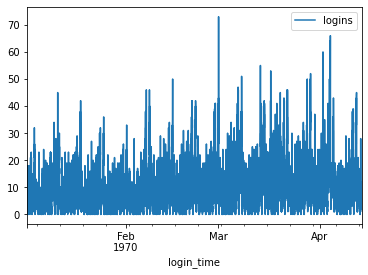

In [11]:
# Let's take a look at the plot

logins_15.plot();

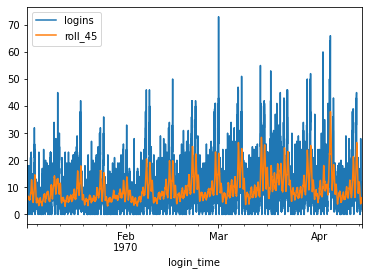

In [12]:
# Very hard to see what's going on with this density
# We'll use 45 day rolling mean to visualize if there is a trend

logins_15['roll_45'] = logins_15.rolling(window=45).mean();
logins_15.plot();

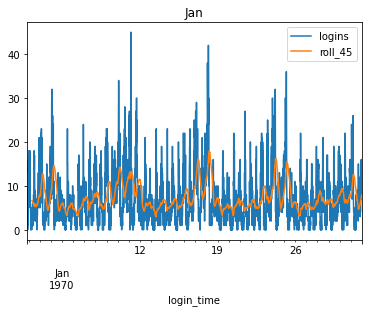

In [13]:
# That's much better. We can see that there is a trend. Above it appears logins are
# overall gradually increasing as the months progress. 
# Each week has a valley at the beginning
# peaking close to the weekend with some individual days (note April) having high counts
# on those weekends 40+

# Let's zoom in on Jan

logins_15.loc['1970-01-01':'1970-01-31'].plot(title='Jan');

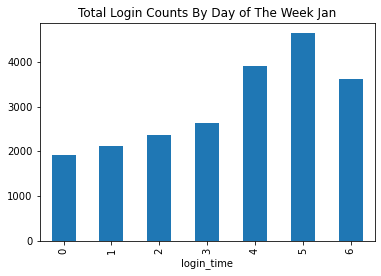

In [14]:
# Trend appears to be a pattern per day of the week. Let's aggregate overall
# login counts per day of the week by month

import matplotlib.pyplot as plt

def day_of_week_count(df):
    """Insert month slice of dataframe to get 
    day of week counts"""
    return df.groupby(df.index.day_of_week).sum()

day_of_week_count(logins_15.loc['1970-01-01':'1970-01-31'])['logins'].plot(kind='bar')
plt.title('Total Login Counts By Day of The Week Jan');

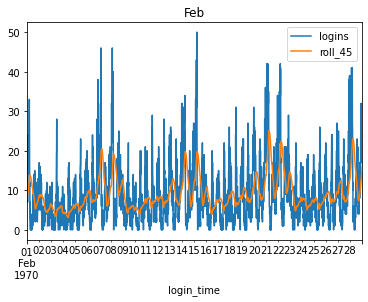

In [15]:
# Looks like approx a 7 day trend 
# We can say Friday, Saturday and Sunday, with Friday and 
# Saturday having the highest total counts.
# There are high counts on individual times on those peaks days
# around 40 on this month

# Now let's look at Feb


logins_15.loc['1970-02-01':'1970-02-28'].plot(title='Feb');

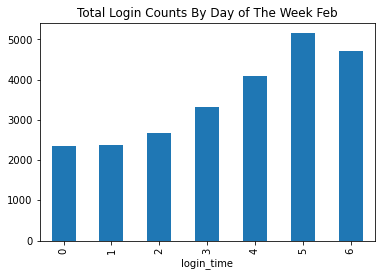

In [16]:
day_of_week_count(logins_15.loc['1970-02-01':'1970-02-28'])['logins'].plot(kind='bar')
plt.title('Total Login Counts By Day of The Week Feb');

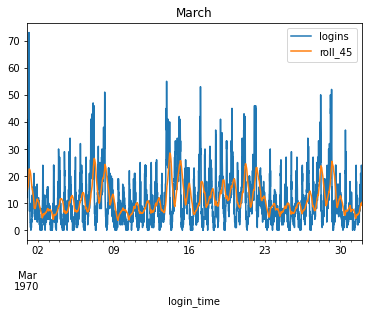

In [17]:
# Also trending by going up from the beginning of the week with higher total counts on
# Friday, Saturday and Sunday, With Saturday and Sunday having
# higher counts. Individual times on those peaks
# reaching mid 40s one of them almost reaching 50 first half of the plot

# Let's take a look at March

logins_15.loc['1970-03-01':'1970-03-31'].plot(title='March');

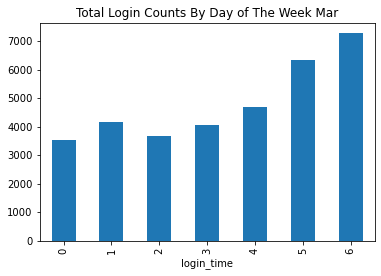

In [18]:
# Let's look at March days of the week

day_of_week_count(logins_15.loc['1970-03-01':'1970-03-31'])['logins'].plot(kind='bar')
plt.title('Total Login Counts By Day of The Week Mar');

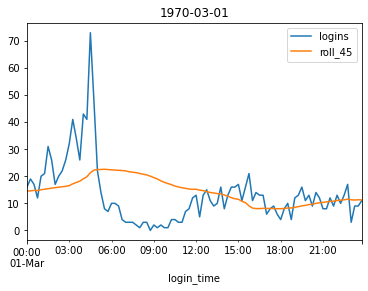

In [19]:
# Saturday and Sunday have the highest counts
# There's a very high peak on the first day of march

logins_15.loc['1970-03-01'].plot(title='1970-03-01');

In [20]:
day_of_week_count(logins['1970-03-01':'1970-03-01'])

,logins
login_time,
6,1273


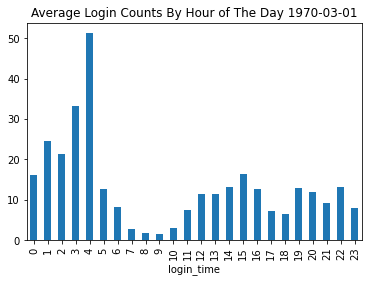

In [21]:
# Ok, it's a sunday
# Time is between 3:00 and 6:00 am

def hour_count(df):
    """Insert slice of dataframe to get 
    hour of the day average counts"""
    return df.groupby(df.index.hour).mean()

hour_count(logins_15.loc['1970-03-01':'1970-03-01'])['logins'].plot(kind='bar')
plt.title('Average Login Counts By Hour of The Day 1970-03-01');

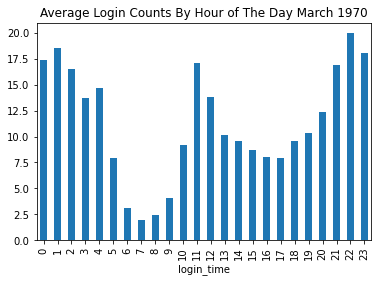

In [22]:
# Around 4 am

# Let's see how the distribution that day is different from
# the average count per hour of the day for the month

hour_count(logins_15.loc['1970-03-01':'1970-03-31'])['logins'].plot(kind='bar')
plt.title('Average Login Counts By Hour of The Day March 1970');

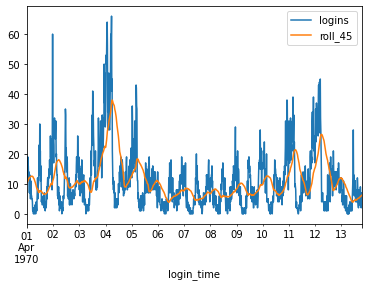

In [23]:
# 1970-03-01 is unusually high compared to the average for that particular
# time of the day

# Now let's take a look at April

logins_15.loc['1970-04-01':'1970-04-13'].plot();

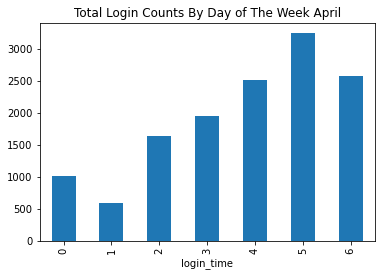

In [24]:
# The data in April seems more erratic, as if it was not following 
# the general pattern we have seen throughout. There are two peaks on the 2nd and 4th, higher than the average peaks 
# peaks in feb and march by about 10 logins approx. then logins drop below the Jan average on the 6th, 
# 7th and 8th and start to come slightly back up to similar levels to Jan there was no more 
# data after the 13th

# Let's look at the distribution based on days of the week

day_of_week_count(logins_15.loc['1970-04-01':'1970-04-13'])['logins'].plot(kind='bar')
plt.title('Total Login Counts By Day of The Week April');

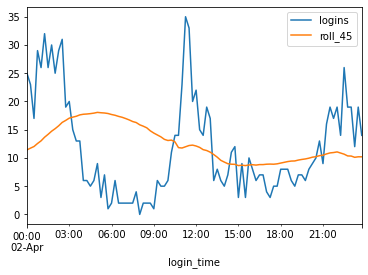

In [25]:

# There's a high peak on the first and 4th day of april

logins_15.loc['1970-04-02'].plot();

In [26]:
day_of_week_count(logins['1970-04-02':'1970-04-02'])

,logins
login_time,
3,1127


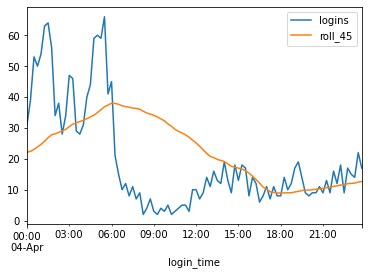

In [27]:
# 4/2 is a Thursday

logins_15.loc['1970-04-04'].plot();

In [28]:
day_of_week_count(logins['1970-04-04':'1970-04-04'])

,logins
login_time,
5,1889


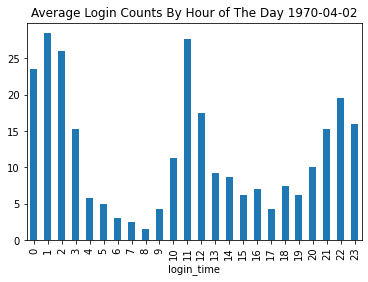

In [29]:
# 4/4 is a Saturday

# It looks like those big peaks are occuring around the same time as
# the peak we previously examined in march

hour_count(logins_15.loc['1970-04-02':'1970-04-02'])['logins'].plot(kind='bar')
plt.title('Average Login Counts By Hour of The Day 1970-04-02');

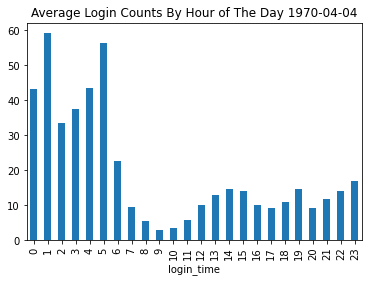

In [30]:
# The general pattern in march showed peaks around 1pm another around 11 am and another around 11 pm. 
# all I see is a drop on the 11 pm here. Let's look at the other day that has a peak

hour_count(logins_15.loc['1970-04-04':'1970-04-04'])['logins'].plot(kind='bar')
plt.title('Average Login Counts By Hour of The Day 1970-04-04');

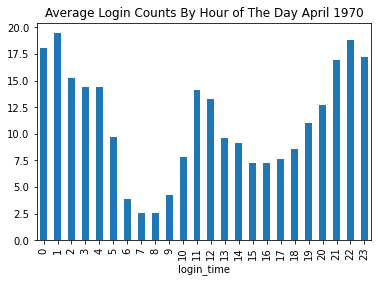

In [31]:
# We also see the 11 pm peak with a sharp drop off, but also like the peak in march, which was 
# between 3 and 6 am, we see a peak at 5 am

# let's check the average login counts by hour of the day for the month (recall the month is not 
# complete)

hour_count(logins_15.loc['1970-04-01':'1970-04-13'])['logins'].plot(kind='bar')
plt.title('Average Login Counts By Hour of The Day April 1970');

In [32]:
# Yes, same average pattern of 1am, 11am, and 11pm

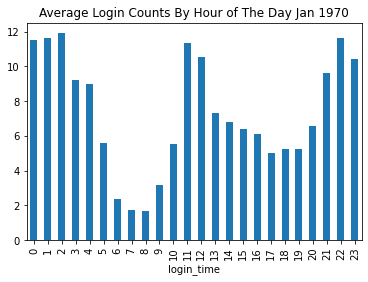

In [33]:
# Let's check the average peak hours for January and February

hour_count(logins_15.loc['1970-01-01':'1970-01-31'])['logins'].plot(kind='bar')
plt.title('Average Login Counts By Hour of The Day Jan 1970');

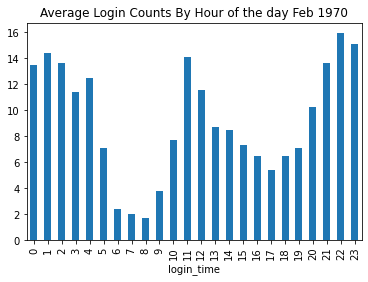

In [34]:
hour_count(logins_15.loc['1970-02-01':'1970-02-28'])['logins'].plot(kind='bar')
plt.title('Average Login Counts By Hour of the day Feb 1970');

In [35]:
def count_logins_by_weekday_by_hour(data, title_date):
    
    """Create plot to identify at what times
    do the highest counts accumulate on average"""

    times = data.index
    grouped = data.groupby([times.hour, times.dayofweek])
    grouped.mean().unstack().plot(kind='barh', figsize=(10,25));
    plt.xlabel('login counts')
    plt.ylabel('hour : military time')
    plt.legend(title = 'day of the week')
    plt.title('Average Login Counts by Hour By Weekday '+ title_date)
    

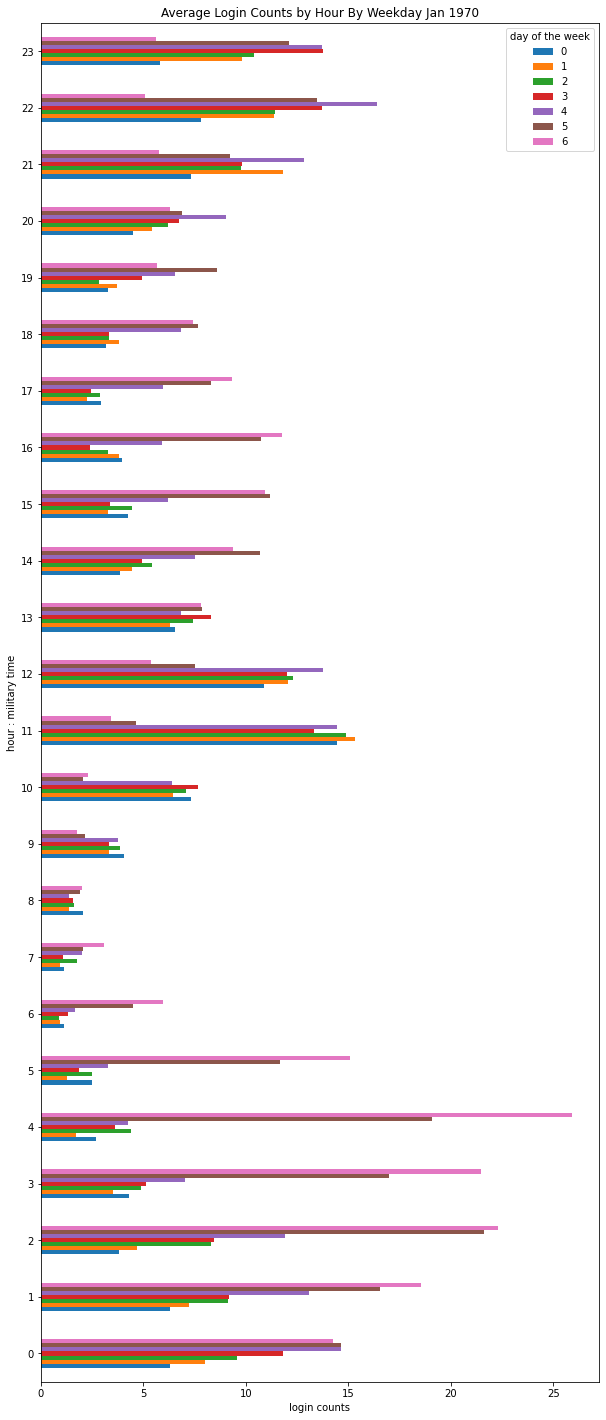

In [36]:
# At what times do the highest counts (Friday, Saturday and Sunday) Acumulate on Average
title_date = 'Jan 1970'
data = logins_15.loc['1970-01-01':'1970-01-31']['logins']
count_logins_by_weekday_by_hour(data=data, title_date=title_date)

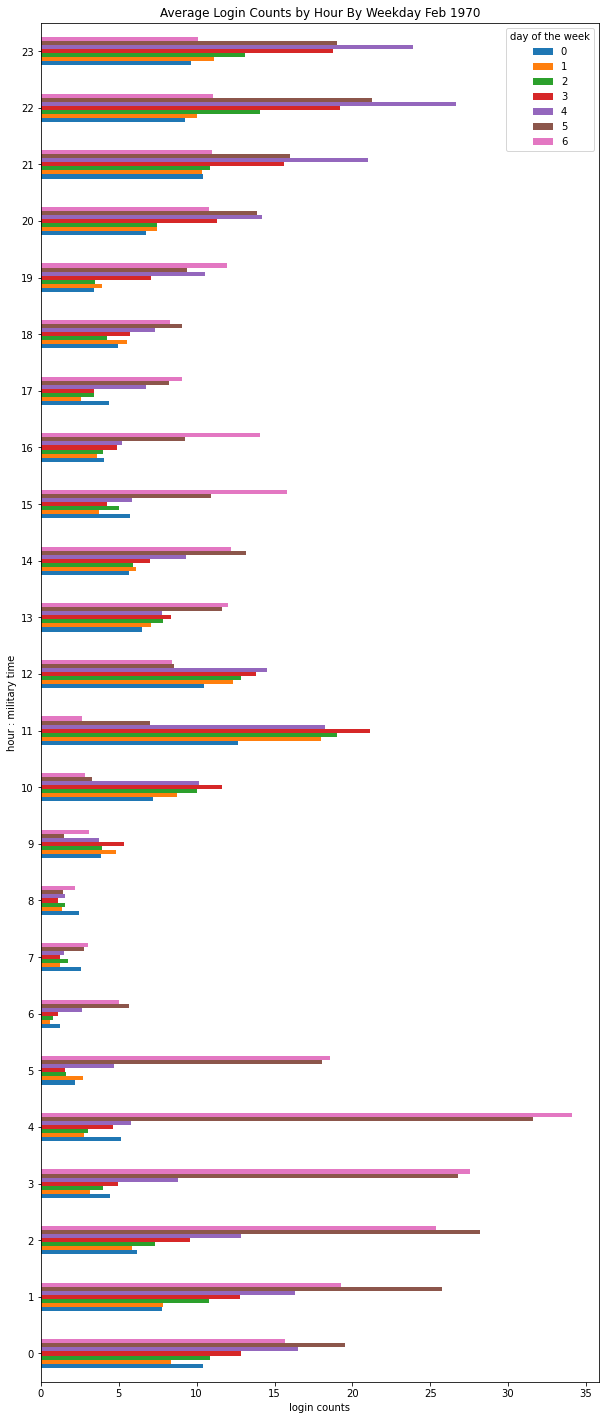

In [37]:
# for january we can see toward the top of the plot
# the highest average counts are:

# Fridays are dominating from 8pm to 10pm

# Saturday's dominate at 7pm

# Friday, Saturday and Sunday dominate from 2pm to 5pm

# Friday, Saturday and Sunday from 12am to 6am very
# dominant at the bottom of the plot with Sunday being
# the strongest day then, Saturday, then Friday

# Let's take a look at Feb

title_date = 'Feb 1970'
data = logins_15.loc['1970-02-01':'1970-02-28']['logins']
count_logins_by_weekday_by_hour(data=data, title_date=title_date)

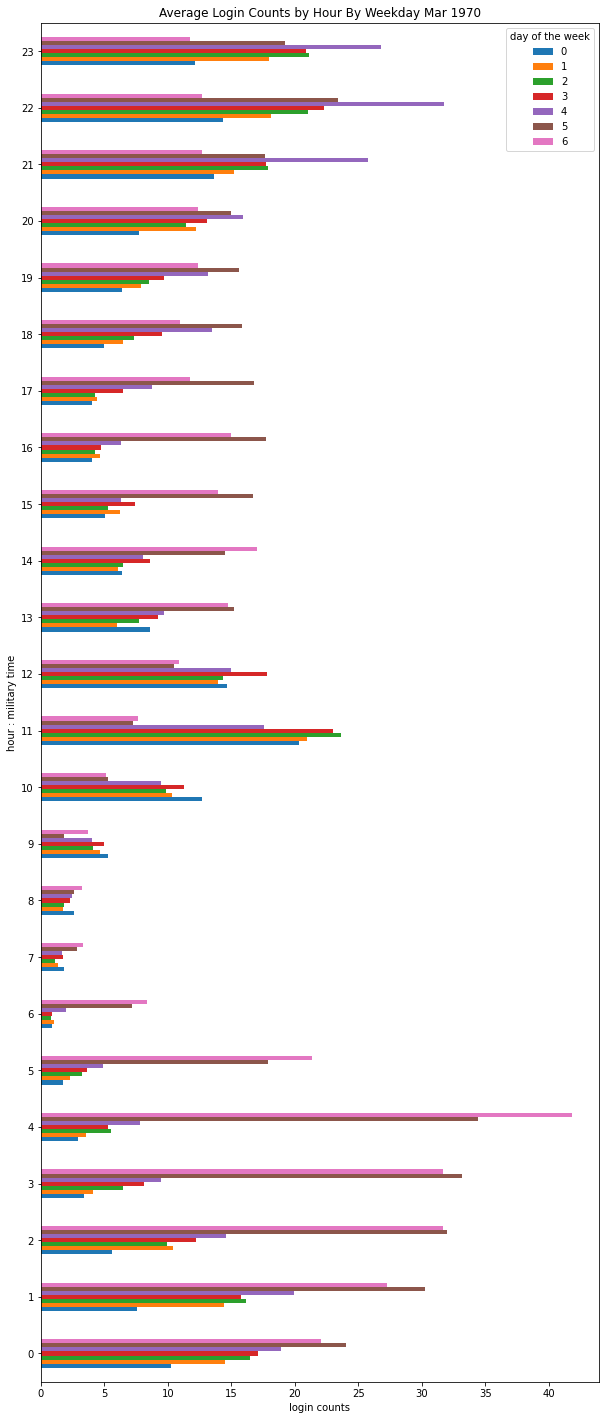

In [38]:
# for February we can see toward the top of the plot
# the highest average counts are:

# Fridays are even more dominant in Feb from 8pm to 10pm

# Sunday's dominate at 7pm

# Saturday and Sunday are dominant from 1pm to 5pm, with Sunday overall
# being more dominant, Friday is less prominent this month

# Friday, Saturday and Sunday from 12am to 6am very
# dominant at the bottom of the plot with Sunday being
# the strongest day then, Saturday, then Friday

# Saturday and Sunday dominate 12 am to 6 am more 
# prominently than anywhere on the graph, Friday has
# higher average counts than other days but it is well
# below the Saturday and Sunday counts

title_date = 'Mar 1970'
data = logins_15.loc['1970-03-01':'1970-03-31']['logins']
count_logins_by_weekday_by_hour(data=data, title_date=title_date)

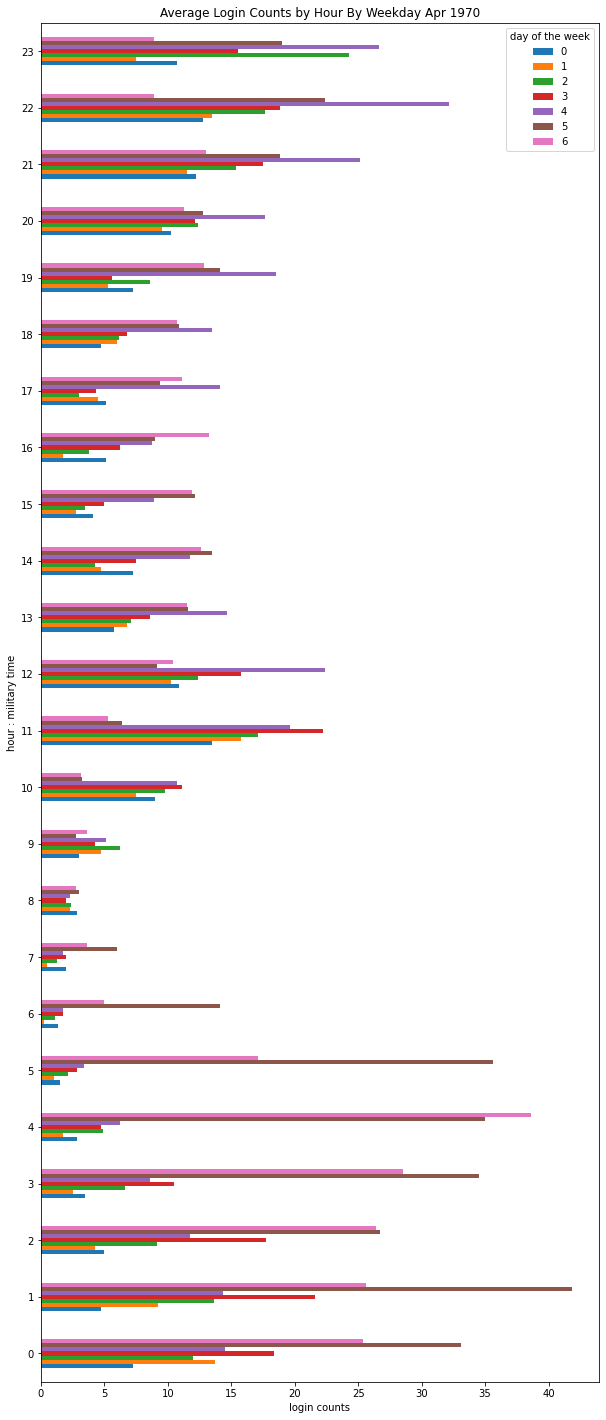

In [39]:
# for March we can see toward the top of the plot
# the highest average counts are:

# Fridays are even more dominant in Mar from 9pm to 11pm

# Saturday dominates at 7, 6, 5, 4 and 3pm, with Sunday and
# Friday following in that order

# Sunday dominates at 2, with Saturday closely following
# Saturday and Sunday both dominating at 1pm

# Friday, Saturday and Sunday from 12am to 6am very
# dominant at the bottom of the plot with Sunday being
# the strongest day then, Saturday, then Friday

# Saturday and Sunday dominate 12 am to 6 am more 
# prominently than anywhere on the graph once more, Sunday having
# the most counts still but with Saturday a close second, Friday has
# higher average counts than other days but it is well
# below the Saturday and Sunday counts

title_date = 'Apr 1970'
data = logins_15.loc['1970-04-01':'1970-04-13']['logins']
count_logins_by_weekday_by_hour(data=data, title_date=title_date)

In [40]:
# for April we can see toward the top of the plot
# the highest average counts are:

# Fridays are even more dominant in April this time
# from 5pm to 11pm

# Sunday dominates at 4pm, with Sunday and
# Friday following in that order

# Sunday dominates at 2, with Saturday closely following
# Saturday and Sunday both dominating at 3pm and 2pm
# Then Friday has a higher count at 1pm with Saturday
# and Sunday following in counts

# Friday also shows higher counts than the rest at noon

# Friday, Saturday and Sunday from 12am to 6am are very
# dominant at the bottom of the plot with Sunday being
# the strongest day then, Saturday, then Friday

# Saturday and Sunday dominate 12 am to 7 am more
# prominently than anywhere on the graph once more, Saturday is
# showing the highest counts this time, with Sunday second highest
# overall. Thursday actually has higher counts overall
# than Friday at this time, so Friday is not the third highest 
# as before